In [204]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
data = pd.read_excel('train_data.xlsx')
data.head()

,کی گفته مرد گریه نمیکنه!؟!؟ سیلم امشب سیل #اصفهان,SAD
0,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...,OTHER
1,تنهاییم شبیه تنهاییه ظهرای بچگیم شده وقتی که ه...,SAD
2,خوبه تمام قسمت‌های گوشی رو محافظت می‌کنه,HAPPY
3,این خاک مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
4,اگه تو بغلت بودم حالم خیلی بهتر میشد,SAD


In [206]:
data.columns = ['Sentence', 'Emotion']
data.head()

,Sentence,Emotion
0,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...,OTHER
1,تنهاییم شبیه تنهاییه ظهرای بچگیم شده وقتی که ه...,SAD
2,خوبه تمام قسمت‌های گوشی رو محافظت می‌کنه,HAPPY
3,این خاک مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
4,اگه تو بغلت بودم حالم خیلی بهتر میشد,SAD


In [207]:
data.describe()

,Sentence,Emotion
count,4923,4923
unique,4923,5
top,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...,HAPPY
freq,1,1462


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  4923 non-null   object
 1   Emotion   4923 non-null   object
dtypes: object(2)
memory usage: 77.0+ KB


In [209]:
data.isnull().sum()

Sentence    0
Emotion     0
dtype: int64

C:\Users\hi\AppData\Local\Temp\ipykernel_5544\1880826210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Emotion', palette='plasma')


<Axes: xlabel='Emotion', ylabel='count'>

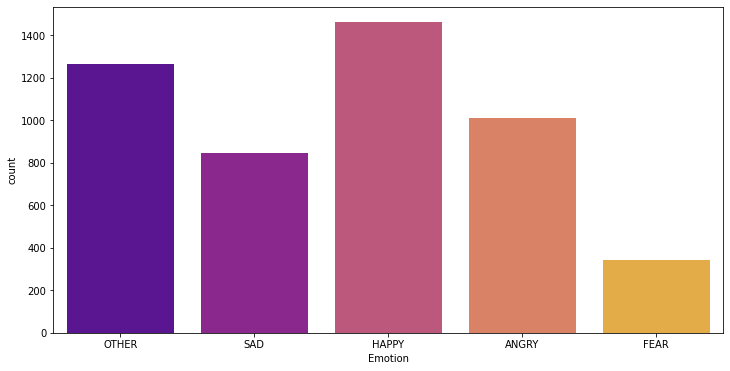

In [210]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Emotion', palette='plasma')

In [211]:
data.duplicated().sum()

0

# Preproccessing

In [212]:
import hazm 
import nltk

In [213]:
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

210
{'#', 'س', 'د', '_', 'ذ', '1', '7', '⭕', 'ٔ', '-', '♂', 'T', 'n', 's', '۰', '٬', '⚽', 'd', 'ِ', 'ᴏ', '/', 'ج', 'e', '؛', 'o', 'H', 'پ', '%', '⭐', 'ك', '[', 'F', '☺', '،', '’', ',', '⚘', '…', 'G', '\n', '۱', ')', 'y', 'ْ', 'ټ', 'L', '!', 'ـ', 'آ', '♀', 'أ', 'P', '۹', '5', '٠', 'چ', '‐', 'Z', '9', 'ف', 't', '٣', '•', 'ل', '²', 'ؤ', 'ژ', '✍', 'v', 'ە', '=', 'ى', '٦', 'x', '✌', '3', '&', '⁉', 'ᴛ', 'ۀ', '‘', 'ً', '۶', '⃟', 'ّ', 'ɴ', '0', 'K', 'q', 'ئ', '8', '2', ']', 'ʏ', 'ز', 'z', 'I', 'D', '۸', 'k', '(', 'خ', 'Y', 'ض', '4', 'W', '♥', '6', '\u2067', '~', '|', 'و', '؟', '?', '❤', '✅', 'م', 'S', '☠', '۲', '\u200c', 'ᴇ', 'گ', 'ص', ':', 'ة', 'U', 'J', 'Q', '☘', '☝', 'ي', '۳', 'ع', '}', 'l', 'h', 'j', 'N', '٢', 'E', 'ھ', 'َ', '✋', '\u200d', 'ر', 'b', '۷', 'A', ';', 'غ', 'u', '٪', 'i', '✨', 'g', 'B', '❄', 'ا', 'ث', '۔', '^', '»', '۴', 'M', 'ن', 'ہ', 'C', 'ت', 'ے', 'ک', 'w', 'ه', '۵', '\u2069', ' ', '*', 'V', '+', 'c', 'ح', 'ش', '⛓', 'R', '⊰', '“', 'ء', '”', '️', '☹', '☄', 'ب', 'ی', 'ق', 'ُ',

In [214]:
def normalize_yeh(text):
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']
    for char in yeh_characters:
        text = text.replace(char, 'ی')
    return text

def number_convertor(text):
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    translation_table = str.maketrans(persian_digits, english_digits)
    return text.translate(translation_table)

In [215]:
data['Sentence'] = data['Sentence'].apply(number_convertor)
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

data['Sentence'] = data['Sentence'].apply(normalize_yeh)
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

199
{'#', 'س', 'د', '_', 'ذ', '1', '7', '⭕', 'ٔ', '-', '♂', 'T', 's', 'n', '٬', '⚽', 'd', 'ِ', 'ᴏ', '/', 'ج', 'e', '؛', 'o', 'H', 'پ', '%', '⭐', 'ك', '[', 'F', '☺', '،', '’', ',', '⚘', '…', 'G', '\n', ')', 'y', 'ْ', 'ټ', 'L', '!', 'ـ', 'آ', '♀', 'أ', 'P', '5', '٠', 'چ', '‐', 'Z', '9', 'ف', 't', '٣', '•', 'ل', '²', 'ؤ', 'ژ', '✍', 'v', 'ە', '=', 'ى', 'x', '✌', '3', '&', '⁉', 'ᴛ', 'ۀ', '‘', 'ً', '⃟', 'ّ', 'ɴ', '0', 'K', 'q', 'ئ', '8', '2', ']', 'ʏ', 'ز', 'z', 'I', 'D', 'k', '(', 'خ', 'Y', '4', 'ض', 'W', '♥', '6', '\u2067', '~', '|', 'و', '؟', '?', '❤', '✅', 'م', 'S', '☠', '\u200c', 'ᴇ', 'گ', 'ص', ':', 'ة', 'U', 'J', 'Q', '☘', '☝', 'ي', 'ع', '}', 'l', 'h', 'j', 'N', '٢', 'E', 'ھ', 'َ', '✋', '\u200d', 'ر', 'b', ';', 'A', '٪', 'غ', 'u', 'i', '✨', 'g', 'B', '❄', 'ا', 'ث', '۔', '^', '»', 'M', 'ہ', 'ن', 'C', 'ت', 'ے', 'ک', 'w', 'ه', '\u2069', ' ', '*', 'V', '+', 'c', 'ح', 'ش', '⛓', 'R', '⊰', '“', 'ء', '”', '️', '☹', '☄', 'ب', 'ی', 'ق', 'ُ', 'a', 'f', '١', 'ظ', '.', '°', '\u2066', 'ط', '٫', '«',

In [216]:
normalizer = hazm.Normalizer()

data['Sentence'] = data['Sentence'].apply(normalizer.normalize)

In [217]:
data['Sentence'] = data['Sentence'].apply(hazm.word_tokenize)
data.head()

,Sentence,Emotion
0,"[عکسی, که, چند, روز, پیش, گذاشته_بودم, این, فی...",OTHER
1,"[تنهاییم, شبیه, تنهاییه, ظهرای, بچگیم, شده, وق...",SAD
2,"[خوبه, تمام, قسمت‌های, گوشی, رو, محافظت, می‌کنه]",HAPPY
3,"[این, خاک‌مال, مردمان, است, نه, حاکمان, #ایران...",ANGRY
4,"[اگه, تو, بغلت, بودم, حالم, خیلی, بهتر, می‌شد]",SAD


In [218]:
lemmatizer = hazm.Lemmatizer()
data['Sentence'] = data['Sentence'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))
data.head()

,Sentence,Emotion
0,عکس که چند روز پیش گذاشت#گذار این فیلم الانشه ...,OTHER
1,تن شبیه تنهاییه ظهرای بچگیم شده وقتی‌که همه می...,SAD
2,خوبه تمام قسمت گوشید#گوش رو محافظت می‌کنه,HAPPY
3,این خاک‌مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
4,اگه تو بغل بود#است حالم خیلی بهتر شد#شو,SAD


In [219]:
import re
data['Sentence'] = data['Sentence'].apply(lambda x: re.sub(r'\d+', '', x))
data.head()

,Sentence,Emotion
0,عکس که چند روز پیش گذاشت#گذار این فیلم الانشه ...,OTHER
1,تن شبیه تنهاییه ظهرای بچگیم شده وقتی‌که همه می...,SAD
2,خوبه تمام قسمت گوشید#گوش رو محافظت می‌کنه,HAPPY
3,این خاک‌مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
4,اگه تو بغل بود#است حالم خیلی بهتر شد#شو,SAD


In [220]:
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

163
{'#', 'س', 'د', '_', 'ذ', '⭕', '-', '♂', 'T', 's', 'n', '٬', '⚽', 'd', 'ᴏ', '/', 'ج', 'e', '؛', 'o', 'H', 'پ', '⭐', '[', 'F', '☺', '،', '’', ',', '⚘', '…', 'G', ')', 'y', 'L', '!', 'آ', '♀', 'أ', 'P', 'چ', '‐', 'Z', 'ف', 't', '•', 'ل', '²', 'ؤ', 'ژ', '✍', 'v', '=', 'x', '✌', '&', '⁉', 'ᴛ', '‘', '⃟', 'ɴ', 'K', 'q', ']', 'ʏ', 'ز', 'z', 'I', 'D', 'k', '(', 'خ', 'Y', 'ض', 'W', '♥', '\u2067', '~', '|', 'و', '؟', '?', '❤', '✅', 'م', 'S', '☠', '\u200c', 'ᴇ', 'گ', 'ص', ':', 'ة', 'U', 'J', 'Q', '☘', '☝', 'ع', '}', 'l', 'h', 'j', 'N', 'E', '"', '✋', '\u200d', 'ر', 'b', ';', 'A', '٪', 'غ', 'u', 'i', '✨', 'g', 'B', '❄', 'ا', 'ث', '^', '»', 'M', 'ن', 'C', 'ت', 'ک', 'w', 'ه', '\u2069', ' ', '*', 'V', '+', 'c', 'ح', 'ش', '⛓', 'R', '⊰', 'ء', '☄', '️', '☹', 'ب', 'ی', 'ق', 'a', 'f', 'ظ', '.', '°', '\u2066', 'ط', '٫', '«', 'm', 'r', 'p', 'O', '¹'}


# Data Splitting

In [221]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, random_state=42, test_size=0.2)

C:\Users\hi\AppData\Local\Temp\ipykernel_5544\1392288644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Emotion', palette='plasma')


<Axes: xlabel='Emotion', ylabel='count'>

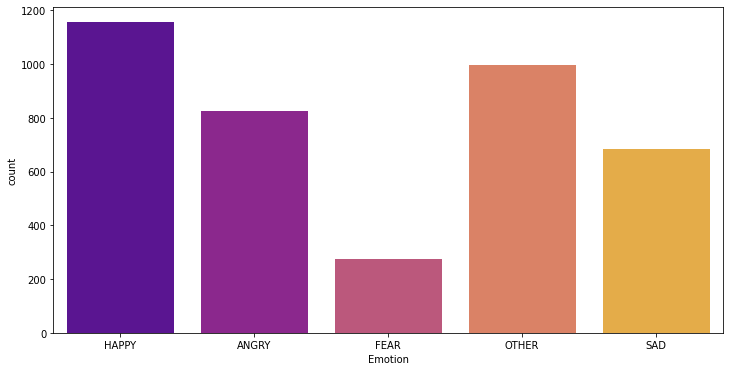

In [222]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Emotion', palette='plasma')

In [223]:
print(train_data.shape)
print(test_data.shape)

(3938, 2)
(985, 2)


In [224]:
train_x = pd.DataFrame(train_data['Sentence'], columns=['Sentence'], index=train_data.index)
train_y = train_data['Emotion']

test_x = pd.DataFrame(test_data['Sentence'], columns=['Sentence'], index=test_data.index)
test_y = test_data['Emotion']

# Feature engineering

In [225]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(train_x['Sentence'])
vectorized_x_train = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out(), index=train_data.index)

vector2 = vectorizer.transform(test_x['Sentence'])
vectorized_x_test = pd.DataFrame(vector2.toarray(), columns=vectorizer.get_feature_names_out(), index=test_data.index)

In [226]:
vectorized_x_train.head()

,__,_اسنپ,_امینی,_ای,_جام,_دی,_زلزله,_و_,_پول,_ژانویه,...,یکمی,یکپارچگی,یکپارچگیه,یکی,یکیشون,یگانه,یی,ییره,ییشینگی,ییمیز
184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
vectorized_x_train.shape

(3938, 7592)

In [229]:
vectorized_x_test.shape

(985, 7592)

# Model Training

In [230]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix, roc_curve, recall_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold

def model_train_test_evaluating(x_train, y_train, x_test, y_test, model, param_grid, model_name):
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    classifier = grid_search.best_estimator_

    y_train_pred = classifier.predict(x_train)
    y_test_pred = classifier.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred, average='macro')
    f1_test = f1_score(y_test, y_test_pred, average='macro') 

    print('Cross validation scores:')
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_:.4f}")
    print(f"Accuracy: {accuracy_score(train_y, y_train_pred):.4f}")

    print('test_data report:')
    print('Acuuracy: ', end='')
    print(test_accuracy)
    print('F1_score: ', end='')
    print(f1_test)

In [231]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import tree

param_grid=[
    {'max_depth': [10, 20, 30], 'min_samples_leaf': [10, 20, 30]}
]

dt_classifier = tree.DecisionTreeClassifier(random_state=42, criterion='gini')
model_train_test_evaluating(vectorized_x_train, train_y, vectorized_x_test, test_y, dt_classifier, param_grid, 'Decision Tree')

Cross validation scores:
Best parameters: {'max_depth': 30, 'min_samples_leaf': 20}
Best score: 0.4916
Accuracy: 0.5470
test_data report:
Acuuracy: 0.5025380710659898
F1_score: 0.45420335367070697


In [234]:
from sklearn.ensemble import RandomForestClassifier

param_grid=[
    {'max_depth': [10, 20, 30], 'n_estimators': [30, 40, 50]}
]

rf_classifier = RandomForestClassifier(random_state=42, criterion='gini')
model_train_test_evaluating(vectorized_x_train, train_y, vectorized_x_test, test_y, rf_classifier, param_grid, 'Decision Tree')

Cross validation scores:
Best parameters: {'max_depth': 30, 'n_estimators': 50}
Best score: 0.5353
Accuracy: 0.7514
test_data report:
Acuuracy: 0.550253807106599
F1_score: 0.4511215129692614


In [236]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

label_encoder = LabelEncoder()
train_y_encoded = label_encoder.fit_transform(train_y)
test_y_encoded = label_encoder.transform(test_y)


param_grid=[
    {'max_depth': [5, 10, 15], 'learning_rate': [0.1, 0.2, 0.3]}
]

xgboost = XGBClassifier(random_state=42)
model_train_test_evaluating(vectorized_x_train, train_y_encoded, vectorized_x_test, test_y_encoded, xgboost, param_grid, 'Decision Tree')

Cross validation scores:
Best parameters: {'learning_rate': 0.3, 'max_depth': 5}
Best score: 0.5879
Accuracy: 0.0000
test_data report:
Acuuracy: 0.6
F1_score: 0.566544810954752
